In [36]:
using Plots, LinearAlgebra, Random, SparseArrays
using Optim

## Rosenbrock function
The rosenbrock function is a 2d function (x,y) -> f(x,y). It has a steep internal valley with a gradual slope that makes it a useful test case. It is
$$ f(x,y) = (1-x)^2 + 100(y-x^2)^2$$
So the function has a global minimizer at x = 1, y = 1

In [37]:
# example of Rosenbrock function 
# NOTE, This doesn't work, see the next cell! 
# See these things are hard to use :) 
function f(x) 
    return (1.0 - x[1])^2 + 100.0 * (x[2] - x[1]^2)^2
end


f (generic function with 1 method)

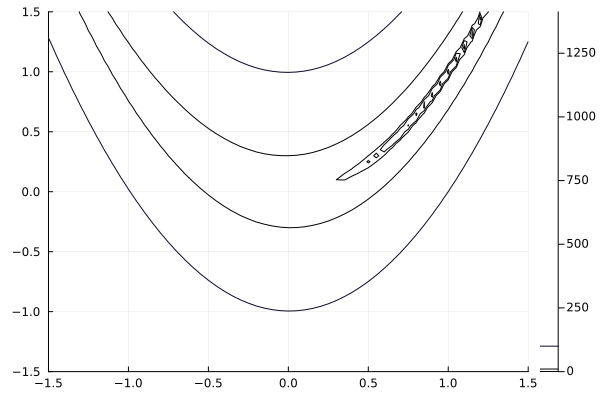

In [38]:
using Plots
ezcontour(x, y, f) = begin
    X = repeat(x', length(y), 1)
    Y = repeat(y, 1, length(x))
    # Evaluate each f(x, y)
    Z = map((x,y) -> f([x,y]), X, Y)
    plot(x, y, Z, st=:contour, levels=[1e-1,0.3,0.5,1e1,1e2])
end
ezcontour(-1.5:0.05:1.5, -1.5:0.05:1.5, 
    f)

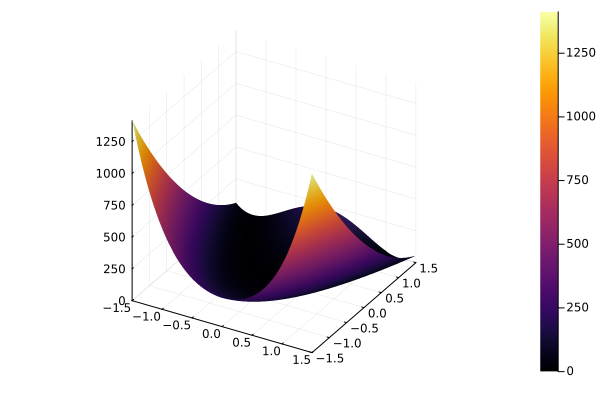

In [42]:
gr()
ezcontour(x, y, f) = begin
    X = repeat(x', length(y), 1)
    Y = repeat(y, 1, length(x))
    # Evaluate each f(x, y)
    Z = map((x,y) -> f([x,y]), X, Y)
    plot(x, y, Z, st=:surface)
end
ezcontour(-1.5:0.05:1.5, -1.5:0.05:1.5, 
    f)

In [33]:
function g!(storage::Vector, x::Vector)
storage[1] = -2.0 * (1.0 - x[1]) - 400.0 * (x[2] - x[1]^2) * x[1]
storage[2] = 200.0 * (x[2] - x[1]^2)
end

soln = optimize(f, g!, [0.0, 0.0], GradientDescent())


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     4.154719e-03

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 1.82e-04 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.95e-04 ≰ 0.0e+00
    |f(x) - f(x')|         = 8.18e-06 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.97e-03 ≰ 0.0e+00
    |g(x)|                 = 8.21e-02 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    1000
    f(x) calls:    2532
    ∇f(x) calls:   2532


In [34]:
soln = optimize(f, g!, [0.0, 0.0], GradientDescent(), 
    Optim.Options(iterations=10000))


 * Status: failure (reached maximum number of iterations)

 * Candidate solution
    Final objective value:     1.488204e-09

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 9.00e-08 ≰ 0.0e+00
    |x - x'|/|x'|          = 9.01e-08 ≰ 0.0e+00
    |f(x) - f(x')|         = 2.40e-12 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.61e-03 ≰ 0.0e+00
    |g(x)|                 = 4.49e-05 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    10000
    f(x) calls:    25032
    ∇f(x) calls:   25032


In [35]:
soln = optimize(f, g!, [0.0, 0.0], GradientDescent(), 
    Optim.Options(iterations=100000))


 * Status: success

 * Candidate solution
    Final objective value:     7.369388e-17

 * Found with
    Algorithm:     Gradient Descent

 * Convergence measures
    |x - x'|               = 2.00e-11 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.00e-11 ≰ 0.0e+00
    |f(x) - f(x')|         = 1.19e-19 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 1.61e-03 ≰ 0.0e+00
    |g(x)|                 = 9.99e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    20458
    f(x) calls:    51177
    ∇f(x) calls:   51177
